<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Session7/Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-06-14 07:34:50.982721


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, Concatenate, GlobalAveragePooling2D, Input
from keras.layers.advanced_activations import ReLU, Softmax
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-14 07:34:53.071781


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-06-14 07:35:01.279104


(60000, 28, 28)
2019-06-14 07:35:03.064275


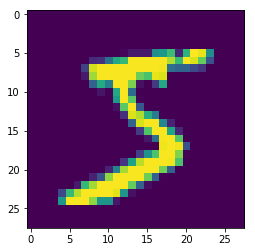

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-14 07:35:07.610776


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-14 07:35:09.381074


In [0]:
y_train[:10]
print(datetime.datetime.now())

2019-06-14 07:35:10.697424


In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-14 07:35:12.206961


In [0]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-14 07:35:16.228580


In [0]:
x1 = Input
x2 = Conv(x1)
x3 = Conv(x1 + x2)
x4 = MaxPooling(x1 + x2 + x3)
x5 = Conv(x4)
x6 = Conv(x4 + x5)
x7 = Conv(x4 + x5 + x6)
x8 = MaxPooling(x5 + x6 + x7)
x9 = Conv(x8)
x10 = Conv (x8 + x9)
x11 = Conv (x8 + x9 + x10)

In [0]:
## MAIN BLOCK
from keras.layers import Activation


x1 = Input(shape=(28,28,1))
x2 = Conv2D(16, (3,3), padding='same', use_bias=False)(x1) #28
x2_x1= Concatenate(axis=-1)([x1,x2])
x3 =  Conv2D(16, (3,3), padding='same', use_bias=False)(x2_x1)#28


x3_x2_x1= Concatenate(axis=-1)([x2_x1,x3])
x4 =  MaxPooling2D(pool_size=(2, 2))(x3_x2_x1)#14

x5= Conv2D(16, (3,3), padding='same', use_bias=False)(x4)#14

x4_x5= Concatenate(axis=-1)([x4,x5])

x6 = Conv2D(16, (3,3), padding='same', use_bias=False)(x4_x5)#14

x6_x5_x4=Concatenate(axis=-1)([x4_x5,x6])

x7=Conv2D(16, (3,3), padding='same', use_bias=False)(x6_x5_x4)#14

x7_x6_x5=Concatenate(axis=-1)([x6_x5_x4,x7])

x8=MaxPooling2D(pool_size=(2, 2))(x7_x6_x5)#7

x9=Conv2D(16, (3,3), padding='same', use_bias=False)(x8)#7

x8_x9=Concatenate(axis=-1)([x8,x9])

x10=Conv2D(16, (3,3), padding='same', use_bias=False)(x8_x9)#7

x8_x9_x10=Concatenate(axis=-1)([x8_x9,x10])

x11=Conv2D(16, (3,3), padding='same', use_bias=False)(x8_x9_x10)#7



output= Conv2D(10, (7,7), use_bias=False)(x11)
output = Flatten()(output)
output = Softmax()(output)


model = Model(inputs=[x1], outputs=[output])

print(datetime.datetime.now())

2019-06-14 07:40:28.845683


In [0]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 28, 28, 16)   144         input_2[0][0]                    
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 28, 28, 17)   0           input_2[0][0]                    
                                                                 conv2d_10[0][0]                  
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 28, 28, 16)   2448        concatenate_8[0][0]              
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

W0614 07:40:53.279919 140389559302016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 07:40:53.311259 140389559302016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



2019-06-14 07:40:53.332294


In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0614 07:40:59.586175 140389559302016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0614 07:40:59.819230 140389559302016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.1414 - acc: 0.9564
Epoch 2/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.0714 - acc: 0.9784
Epoch 3/10
60000/60000 [==============================] - 25s 414us/step - loss: 0.0606 - acc: 0.9812
Epoch 4/10
60000/60000 [==============================] - 25s 414us/step - loss: 0.0530 - acc: 0.9836
Epoch 5/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.0482 - acc: 0.9849
Epoch 6/10
60000/60000 [==============================] - 25s 414us/step - loss: 0.0436 - acc: 0.9860
Epoch 7/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.0424 - acc: 0.9868
Epoch 8/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.0383 - acc: 0.9880
Epoch 9/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.0384 - acc: 0.9878
Epoch 10/10
60000/60000 [==============================] - 25s 415us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-14 07:45:23.974924


In [0]:
print(score)
print(datetime.datetime.now())

[0.06612009593786061, 0.9814]
2019-06-14 07:45:26.566542
